In [2]:
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics


path=r'data/LogisticRegression/Telecom Churn/'
df_cust=pd.read_csv(path+'customer_data.csv')
df_curn=pd.read_csv(path+'churn_data.csv')
df_int=pd.read_csv(path+'internet_data.csv')

df_1= pd.merge(df_cust,df_curn , how='inner',on='customerID')
df_telecom =pd.merge(df_1, df_int, how='inner',on='customerID')

In [12]:
df_telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,...,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,...,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,...,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),...,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,...,151.65,Yes,No,Fiber optic,No,No,No,No,No,No


In [23]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   Contract          7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  Churn             7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [24]:
df_telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
df_telecom['Contract'].astype('category').value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [21]:
df_telecom.select_dtypes(include=['float64', 'int64'])

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [3]:
bin_cols=['PhoneService','PaperlessBilling','Churn','Partner','Dependents','MultipleLines',
         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV' ,'StreamingMovies']
cat_cols=['PaymentMethod','Contract','gender','InternetService']
num_cols=['MonthlyCharges','TotalCharges','tenure','SeniorCitizen']

df1=df_telecom[df_telecom['MultipleLines']== 'No phone service']
df_telecom.loc[df1.index,'MultipleLines']='No'

df_telecom[bin_cols]=df_telecom[bin_cols].apply(lambda s: s.map({'Yes':1 ,'No' :0}))

df_telecom[bin_cols].head()




,PhoneService,PaperlessBilling,Churn,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,1,1,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,1.0,0.0,1.0,1.0,0.0,0.0
4,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_dummies= pd.get_dummies(df_telecom[cat_cols], drop_first=True)

df_dummies.head()

df_telecom[cat_cols].head()

df_telecom= pd.concat([df_telecom,df_dummies], axis=1)
df_telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,StreamingTV,StreamingMovies,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,...,0.0,0.0,0,1,0,0,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,...,0.0,0.0,0,0,1,1,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,...,0.0,0.0,0,0,1,0,0,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,Bank transfer (automatic),...,0.0,0.0,0,0,0,1,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,Electronic check,...,0.0,0.0,0,1,0,0,0,0,1,0


In [5]:
df_telecom=df_telecom.drop(cat_cols , axis=1)

df_telecom.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV,StreamingMovies,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,0.0,0.0,0,1,0,0,0,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,...,0.0,0.0,0,0,1,1,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,0.0,0.0,0,0,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,0.0,0.0,0,0,0,1,0,1,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,0.0,0.0,0,1,0,0,0,0,1,0


In [6]:
df_telecom[num_cols]=df_telecom[num_cols].apply(pd.to_numeric, errors="ignore")
df_telecom['tenure'].isnull().sum()

0

In [78]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines                          7043 non-null   int64  
 11  Onli

In [86]:
df_telecom.isnull().sum()

customerID                               0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Contract_One year                        0
Contract_Two year                        0
gender_Male                              0
InternetSer

In [7]:
cols= list(df_telecom.columns[df_telecom.isnull().sum()>0])

df_telecom[cols]=df_telecom[cols].fillna(0)

df_telecom=df_telecom[~df_telecom['TotalCharges'].map(lambda a :  a if bool(a.strip()) else None ).isnull()]

In [9]:
#test train split


x= df_telecom.drop(['customerID','Churn'],axis=1)
y= df_telecom['Churn']

x.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines,OnlineSecurity,...,StreamingTV,StreamingMovies,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,1,29.85,29.85,0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,0,56.95,1889.5,0,1.0,...,0.0,0.0,0,0,1,1,0,1,0,0
2,0,0,0,2,1,1,53.85,108.15,0,1.0,...,0.0,0.0,0,0,1,0,0,1,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,1.0,...,0.0,0.0,0,0,0,1,0,1,0,0
4,0,0,0,2,1,1,70.70,151.65,0,0.0,...,0.0,0.0,0,1,0,0,0,0,1,0


In [10]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7)

In [11]:

scaler=StandardScaler()

cols_scale=['tenure','MonthlyCharges','TotalCharges']
x_train[cols_scale]= scaler.fit_transform(x_train[cols_scale])

x_train.head()



C:\Users\Ashwini\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Ashwini\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines,OnlineSecurity,...,StreamingTV,StreamingMovies,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,gender_Male,InternetService_Fiber optic,InternetService_No
3898,0,0,0,0.623257,1,0,-1.310048,-0.496189,1,0.0,...,0.0,0.0,1,0,0,1,0,0,0,1
1767,0,1,0,1.559665,1,1,1.674278,2.553748,1,1.0,...,1.0,1.0,1,0,0,0,1,0,1,0
5106,0,0,0,0.786111,1,1,-0.170638,0.330569,0,0.0,...,0.0,1.0,0,1,0,0,0,0,0,0
548,1,1,0,0.704684,1,1,1.235406,1.311711,1,1.0,...,1.0,0.0,0,0,0,1,0,1,1,0
7038,0,1,1,-0.353864,1,1,0.669014,-0.134521,1,1.0,...,1.0,1.0,0,0,1,1,0,1,0,0


In [12]:
#churn rate 

rate = sum(y_train )/ len(y_train)
round(rate*100)

26

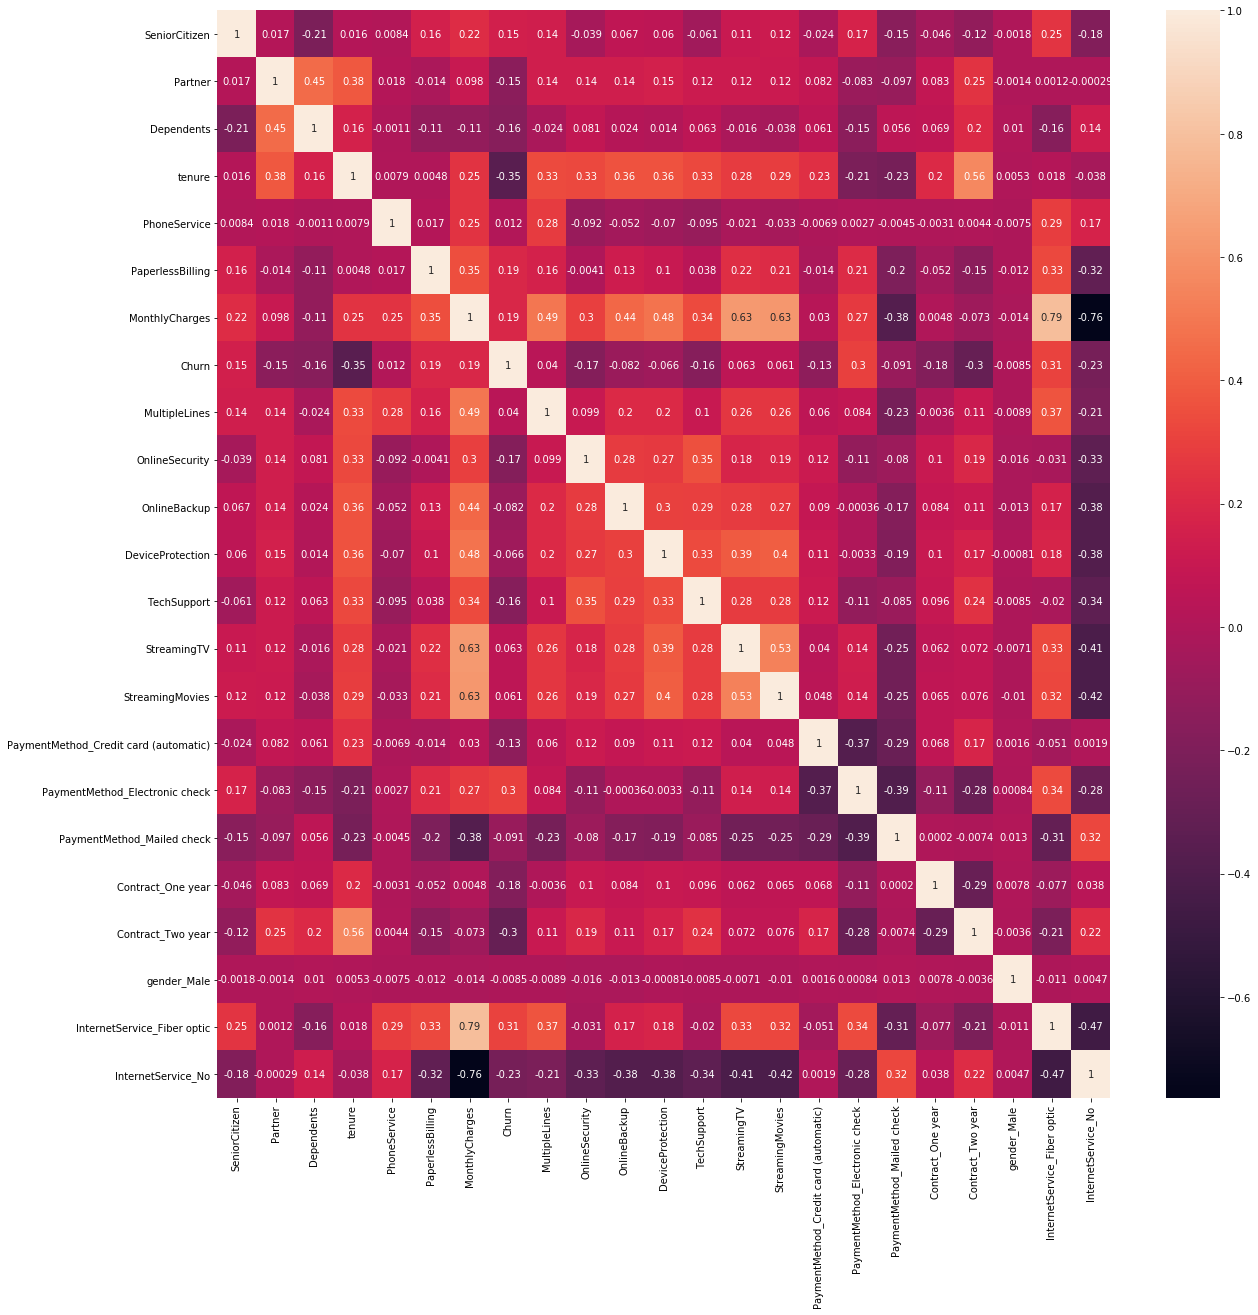

In [13]:

plt.figure(figsize=(20,20))
sns.heatmap(df_telecom.corr(),annot=True)

In [14]:
#modeling 


logml = sm.GLM(y_train, sm.add_constant(x_train),family=sm.families.Binomial())
m=logml.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.0
Date:                Sat, 16 May 2020   Deviance:                       4050.0
Time:                        18:05:11   Pearson chi2:                 5.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8651      1.524     -1.224      0.221      -4.852       1.122
SeniorCitizen                             0.1111      0.102      1.086      0.277      -0.089       0.311
Partner                                  -0.0139      0.094     -0.148      0.882      -0.198       0.170
Dependents                               -0.1248      0.108     -1.160      0.246      -0.336       0.086
tenure                                   -1.4487      0.183     -7.931      0.000      -1.807      -1.091
PhoneService                             -0.1485      0.781     -0.190      0.849      -1.679       1.382
PaperlessBilling                          0.4358      0.090      4.845      0.000       0.259       0.612
MonthlyCharges                           -0.5807      1.154     -0.503      0.615      -2.842       1.680
TotalCharges                              0.7204      0.191      3.775      0.000       0.346       1.094
MultipleLines                             0.3590      0.212      1.694      0.090      -0.056       0.774
OnlineSecurity                           -0.3698      0.215     -1.721      0.085      -0.791       0.051
OnlineBackup                             -0.0124      0.211     -0.059      0.953      -0.427       0.402
DeviceProtection                         -0.0322      0.212     -0.152      0.879      -0.448       0.383
TechSupport                              -0.2809      0.215     -1.304      0.192      -0.703       0.141
StreamingTV                               0.3532      0.394      0.898      0.369      -0.418       1.125
StreamingMovies                           0.3985      0.394      1.012      0.312      -0.373       1.170
PaymentMethod_Credit card (automatic)    -0.0731      0.136     -0.537      0.591      -0.340       0.194
PaymentMethod_Electronic check            0.2867      0.113      2.529      0.011       0.065       0.509
PaymentMethod_Mailed check               -0.0799      0.138     -0.578      0.563      -0.351       0.191
Contract_One year                        -0.6818      0.128     -5.341      0.000      -0.932      -0.432
Contract_Two year                        -1.4244      0.213     -6.675      0.000      -1.843      -1.006
gender_Male                               0.0541      0.078      0.695      0.487      -0.099       0.207
InternetService_Fiber optic               1.0941      0.960      1.140      0.254      -0.787       2.975
InternetService_No                       -1.3918      0.971     -1.433      0.152      -3.296       0.512
=========================================================================================================
"""

In [15]:

lg= LogisticRegression()


rfe=RFE(lg,15)
rfe=rfe.fit(x_train, y_train)

cols= x_train.columns[rfe.support_]

In [16]:

logml = sm.GLM(y_train, sm.add_constant(x_train[cols]),family=sm.families.Binomial())
m=logml.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.7
Date:                Sat, 16 May 2020   Deviance:                       4055.4
Time:                        18:05:36   Pearson chi2:                 5.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.4379      0.256     -1.708      0.088      -0.940       0.065
tenure                            -1.4445      0.179     -8.075      0.000      -1.795      -1.094
PhoneService                      -0.9030      0.189     -4.779      0.000      -1.273      -0.533
PaperlessBilling                   0.4465      0.089      4.994      0.000       0.271       0.622
MonthlyCharges                     0.5310      0.180      2.958      0.003       0.179       0.883
TotalCharges                       0.7257      0.189      3.838      0.000       0.355       1.096
MultipleLines                      0.1824      0.100      1.822      0.068      -0.014       0.379
OnlineSecurity                    -0.5617      0.105     -5.349      0.000      -0.767      -0.356
OnlineBackup                      -0.1994      0.097     -2.061      0.039      -0.389      -0.010
DeviceProtection                  -0.2132      0.102     -2.088      0.037      -0.413      -0.013
TechSupport                       -0.4726      0.108     -4.379      0.000      -0.684      -0.261
PaymentMethod_Electronic check     0.3505      0.083      4.218      0.000       0.188       0.513
Contract_One year                 -0.7029      0.127     -5.536      0.000      -0.952      -0.454
Contract_Two year                 -1.4574      0.212     -6.861      0.000      -1.874      -1.041
InternetService_Fiber optic        0.2003      0.190      1.057      0.291      -0.171       0.572
InternetService_No                -0.4851      0.231     -2.104      0.035      -0.937      -0.033
==================================================================================================
"""

In [22]:

y_train_pred= m.predict(sm.add_constant(x_train[cols]))
y_train_pred_result =y_train_pred.map(lambda s : 1 if s >0.6 else 0 )

confusion = metrics.confusion_matrix(y_train,y_train_pred_result )

metrics.accuracy_score(y_train,y_train_pred_result )

#3250+693/ (3250+693+372+607)

0.800284437220642

In [25]:
confusion

#Actual/ predict  NOT CHURN | CHURN
#      NOT CHURN  True Neg.   False Pos.    
#         CHURN   False Neg.  True Pos.

TN=confusion[0][0]
TP=confusion[1][1]
FP=confusion[0][1]
FN=confusion[1][0]


TP_rate= TP / (TP+FN)
FP_rate= FP / (FP+TN)

print (TP_rate, FP_rate)

0.3861003861003861 0.0518334711883099


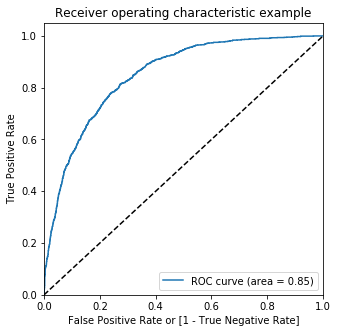

In [26]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_train,y_train_pred)

In [36]:
numbers= [n/10 for n in range(10)]
for n in numbers:    
    y_train_pred[n]= y_train_pred.map(lambda s: 1 if s >n else 0 ) 
    
y_train_pred

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [29]:





cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

KeyError: 0